# Summary
- Analysis of fine-tuned models

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from ipywidgets import FloatSlider, interactive
import sys
sys.path.append('..')
from var import fname2mname, network2pair, network_sort_key

In [2]:
# loading in them all made my machine run out of memory
method_l = [
     "maxcorr", 
     "mincorr", 
     "maxlinreg", 
     "minlinreg", 
    "cca", 
    "lincka", 
    # "rbfcka",
]

In [4]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/belinkov/contextual-corr-analysis/repr_fine_results5_"
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

network_l = [network for network in res_d["cca"]["corrs"]]
network_l = sorted(network_l, key=network_sort_key)

num_neurons_d = {}
for network in network_l:
    num_neurons_d[network] = len(next(iter(res_d["cca"]["corrs"][network].values()))) # god this is a hack

['xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_0', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_1', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_2', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_3', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_4', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_5', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_6', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_7', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_8', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_9', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_10', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_11', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_12', 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0', 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_1', 'xlnet_base_cased-ptb_pos

In [5]:
network_l

['xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0',
 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_1',
 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_2',
 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_3',
 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_4',
 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_5',
 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_6',
 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_7',
 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_8',
 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_9',
 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_10',
 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_11',
 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12',
 'xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_0',
 'xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_1',
 'xlnet_base_cased-ptb_pos_dev_qnli_i

# MaxCorr, MinCorr, MaxLinReg, MinLinReg

### Sorts

In [6]:
rk_methods = {"maxcorr", "mincorr", "maxlinreg", "minlinreg"}

In [7]:
neuron_sorts = {network: {} for network in network_l}
for network in network_l:
    for method in rk_methods:
        neuron_sorts[network][method] = res_d[method]["neuron_sort"][network]

In [8]:
# Set `rk_ar_d`, `rk_df_d`, `spearman_d`
rk_ar_d = {}
rk_df_d = {}
spearman_d = {}
for network in network_l:
    # rk_ar[method_ix, neuron] = rank
    # need to invert the permutation
    rk_ar = np.stack([
            [neuron_sorts[network][method].index(neuron) for neuron in range(len(neuron_sorts[network][method]))]
                      for method in rk_methods
    ]).T
    rk_df = pd.DataFrame(rk_ar, columns=list(rk_methods))
    
    rk_ar_d[network] = rk_ar
    rk_df_d[network] = rk_df
    spearman_d[network] = rk_df.corr()

In [9]:
for network in network_l:
    print(network)
    # print(rk_df_d[network])
    print(spearman_d[network])

xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0
           maxlinreg   mincorr   maxcorr  minlinreg
maxlinreg   1.000000  0.101822  0.646360   0.173463
mincorr     0.101822  1.000000  0.052248   0.607750
maxcorr     0.646360  0.052248  1.000000   0.127746
minlinreg   0.173463  0.607750  0.127746   1.000000
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_1
           maxlinreg   mincorr   maxcorr  minlinreg
maxlinreg   1.000000 -0.183025  0.902854  -0.336561
mincorr    -0.183025  1.000000 -0.172305   0.570897
maxcorr     0.902854 -0.172305  1.000000  -0.295072
minlinreg  -0.336561  0.570897 -0.295072   1.000000
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_2
           maxlinreg   mincorr   maxcorr  minlinreg
maxlinreg   1.000000 -0.160275  0.925523  -0.298883
mincorr    -0.160275  1.000000 -0.182513   0.540138
maxcorr     0.925523 -0.182513  1.000000  -0.344825
minlinreg  -0.298883  0.540138 -0.344825   1.000000
xlnet_base_cased-ptb_pos_dev_mnli_includ

### Distributions

In [10]:
for network in network_l:
    print("\n\n" + network + ":")
    for method in rk_methods:
        print("\n" + method)
        if method == "maxlinreg" or method == "minlinreg": 
            corr_df = pd.DataFrame(res_d[method]['pred_power'][network])
        else:
            corr_df = pd.DataFrame(res_d[method]['corrs'][network])
        
        print("\nmaxcounts")
        print(corr_df.idxmax(axis=1).value_counts())
        
        print("\nmincounts")
        print(corr_df.idxmin(axis=1).value_counts())
        
        print("\ncorr_df_pctl")
        corr_df_pctl = pd.DataFrame()
        corr_df_pctl["max"] = corr_df.max(axis=1)
        corr_df_pctl["min"] = corr_df.min(axis=1)
        corr_df_pctl["med"] = corr_df.median(axis=1)
        print(corr_df_pctl.rank().corr()) # spearman
        
#         corr_df.plot()
#         plt.xlabel("neuron (sorted order)")
#         plt.ylabel("correlation")
#         plt.show()
        
#         plt.hist(corr_ar.ravel(), bins=100)
#         plt.xlabel("correlation")
#         plt.ylabel("count")
#         plt.show()



xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0:

maxlinreg

maxcounts
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_0    766
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_0       2
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12    743
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12      25
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.173462  0.695577
min  0.173462  1.000000  0.296877
med  0.695577  0.296877  1.000000

mincorr

maxcounts
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_0    504
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_0     144
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_0      112
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_0         8
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12      168
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12     

          max       min       med
max  1.000000 -0.182513  0.872482
min -0.182513  1.000000 -0.176915
med  0.872482 -0.176915  1.000000

minlinreg

maxcounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_3    592
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_1    176
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12    552
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12     208
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9        6
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8        1
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_11       1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000 -0.298883  0.883421
min -0.298883  1.000000 -0.117017
med  0.883421 -0.117017  1.000000


xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_3:

maxlinreg

maxcounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_4    651
xlnet_base_cased-ptb_pos_dev_

          max       min       med
max  1.000000  0.280600  0.826738
min  0.280600  1.000000  0.367898
med  0.826738  0.367898  1.000000


xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_6:

maxlinreg

maxcounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_7    768
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8     506
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9     186
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12     75
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0      1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.413235  0.753833
min  0.413235  1.000000  0.546728
med  0.753833  0.546728  1.000000

mincorr

maxcounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_5      707
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_7       60
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_0      1
dtype: int64

mincounts
xlnet_

          max       min       med
max  1.000000  0.086231  0.197017
min  0.086231  1.000000  0.880060
med  0.197017  0.880060  1.000000

mincorr

maxcounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_10    493
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_11    217
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12     58
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0      284
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_0       115
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_0      99
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_0     69
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_0       63
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12       33
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_7        23
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8        19
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_1     

          max       min       med
max  1.000000 -0.014966  0.212496
min -0.014966  1.000000  0.866674
med  0.212496  0.866674  1.000000

maxcorr

maxcounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_11    551
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_10    149
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_9      68
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0      364
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_0     145
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_0        88
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_0       86
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_0     42
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12        8
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8         7
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_1        6
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_1    

          max       min       med
max  1.000000 -0.203195  0.852154
min -0.203195  1.000000 -0.193675
med  0.852154 -0.193675  1.000000

minlinreg

maxcounts
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_2    766
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_2       1
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_3        1
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12    663
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12     104
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9        1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000 -0.437012  0.919008
min -0.437012  1.000000 -0.294914
med  0.919008 -0.294914  1.000000


xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_3:

maxlinreg

maxcounts
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_3    753
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_4       14
xlnet_base_cased-ptb_

          max       min       med
max  1.000000 -0.322310  0.966475
min -0.322310  1.000000 -0.325416
med  0.966475 -0.325416  1.000000


xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_6:

maxlinreg

maxcounts
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_7    768
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12    378
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12     255
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9       85
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8       50
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000 -0.100710  0.940757
min -0.100710  1.000000 -0.041907
med  0.940757 -0.041907  1.000000

mincorr

maxcounts
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_5      614
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_7      152
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_6      2
dtype: int64

mincounts
xl


maxcounts
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_10    695
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_8      71
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_11      2
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_12    267
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12     178
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12       74
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9        58
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_10       47
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_11       46
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_11      33
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8        25
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_10      23
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_9        7
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0        4
xl

          max       min       med
max  1.000000  0.352904  0.840720
min  0.352904  1.000000  0.620793
med  0.840720  0.620793  1.000000

maxcorr

maxcounts
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_11    766
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_10      2
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0      466
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_0     155
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_0        70
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_0       20
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_1       12
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_1       8
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_1         6
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_1      5
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_0      5
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_2   

xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_2    758
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_3         9
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_2        1
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12    713
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12      53
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8        1
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_10       1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000 -0.370313  0.911898
min -0.370313  1.000000 -0.223351
med  0.911898 -0.223351  1.000000


xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_3:

maxlinreg

maxcounts
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_4       766
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_2         1
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_3      1
dtype: int64

mincounts
xlnet_base_cased-pt

          max       min       med
max  1.000000  0.322674  0.575720
min  0.322674  1.000000 -0.188622
med  0.575720 -0.188622  1.000000


xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_6:

maxlinreg

maxcounts
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_7    738
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_5     30
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0      592
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12     130
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_0       15
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_11      12
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_0         9
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_0      5
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_0       5
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000 -0.608399  0.557838
min -0.608399  1.000000 -0.060759
med  0.55783

xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_10    577
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_11    191
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0      555
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_0     73
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_0        64
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_0      45
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_0       31
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.447067  0.445531
min  0.447067  1.000000  0.931246
med  0.445531  0.931246  1.000000

mincorr

maxcounts
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_10     288
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_11     210
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8      143
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12     120
xlnet_base_cased-ptb_pos_dev_qqp_include_e

xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_11    520
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8     113
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_10     66
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9      64
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_7       5
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0      390
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_0      226
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_0      82
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_0        37
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_1       19
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_2      6
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_1        2
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_12      2
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_2       1
xlnet_base_cased-ptb

          max       min       med
max  1.000000 -0.134489  0.795363
min -0.134489  1.000000 -0.179415
med  0.795363 -0.179415  1.000000

maxcorr

maxcounts
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_2    765
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_2        2
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_0      1
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12      154
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12     138
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_10      128
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9       112
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_11      105
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_12     49
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8        23
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_11      23
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_12 


maxcounts
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_4     375
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_6     305
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_5     88
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12      161
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12     147
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9       129
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_10      114
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_11       91
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_12      47
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_11      29
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_10      20
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8        17
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_12     11
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_7         2


maxcounts
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_9    767
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_7      1
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8      375
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9      212
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12     169
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12     11
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0       1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.470446  0.468359
min  0.470446  1.000000  0.526400
med  0.468359  0.526400  1.000000


xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_9:

maxlinreg

maxcounts
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_10    768
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8     570
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9     118
xlnet_base_ca

xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0      593
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8       104
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_0       30
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_0        27
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_0      6
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9         4
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_0       4
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.018553  0.406700
min  0.018553  1.000000  0.768854
med  0.406700  0.768854  1.000000


xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_12:

maxlinreg

maxcounts
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_11    768
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_0      705
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_0       25
xlnet_base_cased-ptb_pos_dev_qqp_inc

xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12    700
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12      65
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9        2
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_10       1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000 -0.375400  0.936321
min -0.375400  1.000000 -0.262276
med  0.936321 -0.262276  1.000000

mincorr

maxcounts
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_2     764
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_2        3
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_0      1
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12     148
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12      147
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_10      127
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_11      102
xlnet_base_cased-ptb_pos_dev_qqp_inclu

xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9       144
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12     125
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12      106
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_11      101
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_10       95
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_12     92
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_11      47
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8        27
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_10      17
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_12      14
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000 -0.203676  0.913573
min -0.203676  1.000000 -0.270205
med  0.913573 -0.270205  1.000000

maxcorr

maxcounts
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_6    514
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf

xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_9    460
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_7    308
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9       138
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12     137
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_11      109
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12      106
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_10      106
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_12     74
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_11      35
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8        30
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_12      17
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_10      16
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000 -0.091113  0.880391
min -0.091113  1.000000 -0.150264
med  0.880391 -0.15


maxcounts
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_10    767
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_12      1
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12     299
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9      181
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8      156
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12    127
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_11       3
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_10       2
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.073906  0.819043
min  0.073906  1.000000 -0.050218
med  0.819043 -0.050218  1.000000


xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_12:

maxlinreg

maxcounts
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_11    768
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8      329
xlne

# LinCKA

In [11]:
lincka_df = pd.DataFrame(res_d['lincka']['similarities'])
lincka_df = lincka_df.reindex(network_l)
lincka_df = lincka_df.reindex(lincka_df.columns)

In [12]:
# network = "elmo_original_0"
# lincka_df.sort_values(by=network)[network]

# RBFCKA

In [13]:
# rbfcka_d = torch.load(res_fname["rbfcka"])
# rbfcka_df = pd.DataFrame(rbfcka_d)

In [14]:
# rbfcka_df

In [15]:
# network = "bert_large_cased_0"
# rbfcka_df.sort_values(by=network)[network]

# CCA

In [16]:
sv_corrs = res_d['cca']['corrs']
sv_similarities = res_d['cca']['sv_similarities']
pw_similarities = res_d['cca']['pw_similarities']
pw_corrs = res_d['cca']['pw_corrs']
pw_alignments = res_d['cca']['pw_alignments']

In [17]:
sv_sim_df = pd.DataFrame(sv_similarities)
sv_sim_df = sv_sim_df.reindex(network_l)
sv_sim_df = sv_sim_df.reindex(sv_sim_df.columns)

pw_sim_df = pd.DataFrame(pw_similarities)
pw_sim_df = pw_sim_df.reindex(network_l)
pw_sim_df = pw_sim_df.reindex(pw_sim_df.columns)

sv_corrs_df = pd.DataFrame(sv_corrs)
sv_corrs_df = sv_corrs_df.reindex(network_l)
sv_corrs_df = sv_corrs_df.reindex(sv_corrs_df.columns)

pw_corrs_df = pd.DataFrame(pw_corrs)
pw_corrs_df = pw_corrs_df.reindex(network_l)
pw_corrs_df = pw_corrs_df.reindex(pw_corrs_df.columns)

pw_alignments_df = pd.DataFrame(pw_alignments)
pw_alignments_df = pw_alignments_df.reindex(network_l)
pw_alignments_df = pw_alignments_df.reindex(pw_alignments_df.columns)

In [18]:
max_corrs_df = sv_corrs_df.applymap(lambda t: float('nan') if type(t) is float else t.max().item())

### SVCCA

In [19]:
# network = "elmo_original_0"
# sv_sim_df.sort_values(by=network)[network]

### PWCCA

In [20]:
# network = "elmo_original_0"
# pw_sim_df.sort_values(by=network)[network]

# Heatmaps

In [25]:
short_labels = [label.split('_')[0] + ' ' + label.split('_')[-4] + ' ' + label.split('_')[-1] for label in network_l]
print(short_labels)

['xlnet mnli 0', 'xlnet mnli 1', 'xlnet mnli 2', 'xlnet mnli 3', 'xlnet mnli 4', 'xlnet mnli 5', 'xlnet mnli 6', 'xlnet mnli 7', 'xlnet mnli 8', 'xlnet mnli 9', 'xlnet mnli 10', 'xlnet mnli 11', 'xlnet mnli 12', 'xlnet qnli 0', 'xlnet qnli 1', 'xlnet qnli 2', 'xlnet qnli 3', 'xlnet qnli 4', 'xlnet qnli 5', 'xlnet qnli 6', 'xlnet qnli 7', 'xlnet qnli 8', 'xlnet qnli 9', 'xlnet qnli 10', 'xlnet qnli 11', 'xlnet qnli 12', 'xlnet qqp 0', 'xlnet qqp 1', 'xlnet qqp 2', 'xlnet qqp 3', 'xlnet qqp 4', 'xlnet qqp 5', 'xlnet qqp 6', 'xlnet qqp 7', 'xlnet qqp 8', 'xlnet qqp 9', 'xlnet qqp 10', 'xlnet qqp 11', 'xlnet qqp 12', 'xlnet sst-2 0', 'xlnet sst-2 1', 'xlnet sst-2 2', 'xlnet sst-2 3', 'xlnet sst-2 4', 'xlnet sst-2 5', 'xlnet sst-2 6', 'xlnet sst-2 7', 'xlnet sst-2 8', 'xlnet sst-2 9', 'xlnet sst-2 10', 'xlnet sst-2 11', 'xlnet sst-2 12', 'xlnet unfine 0', 'xlnet unfine 1', 'xlnet unfine 2', 'xlnet unfine 3', 'xlnet unfine 4', 'xlnet unfine 5', 'xlnet unfine 6', 'xlnet unfine 7', 'xlnet unfi

In [26]:
plt.rcParams["figure.figsize"] = (20,15)

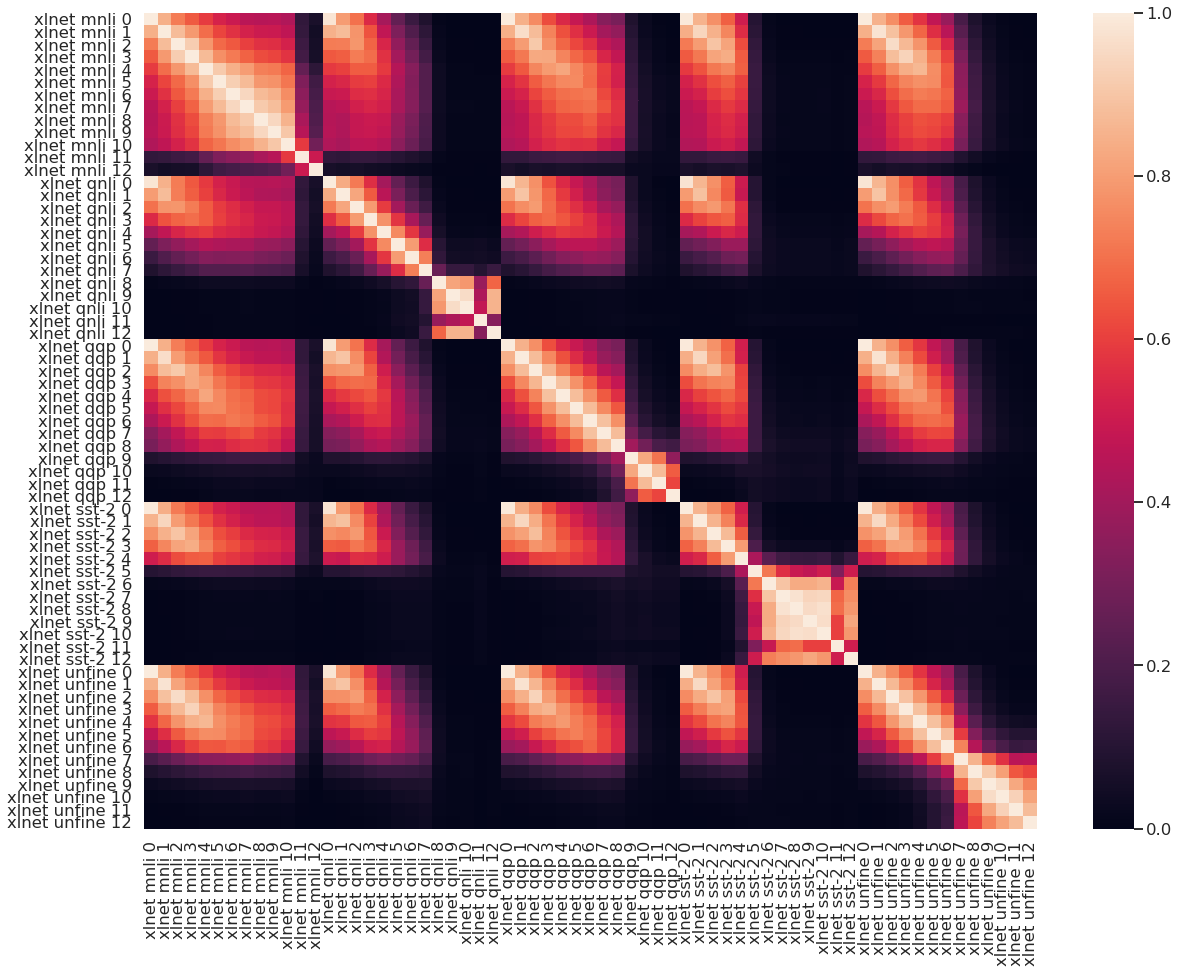

In [27]:
# lincka
g = sns.heatmap(lincka_df.fillna(1), vmin=0, vmax=1, xticklabels=short_labels, yticklabels=short_labels)
g.get_figure().savefig('xlnet-lincka-heatmap-finetuned.pdf')

In [28]:
def corrs_update(fl, corr_df, fname_prefix, weights_df=None):
    fname = "{0}{1:.2f}.png".format(fname_prefix, fl)
    try:
        im = plt.imread(fname)
        plt.imshow(im)
    except:
        if weights_df is None: # eg. svcca, don't need to do special division
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else 
                                              t[:int(fl*len(t))].mean())
        else:
            denominator_df = weights_df.applymap(lambda t: float('nan') if type(t) is float else 
                                                             t[:int(fl*len(t))].sum())
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else
                                            t[:int(fl*len(t))].sum())
            df /= denominator_df
        sns.heatmap(df.fillna(1), vmin=0, vmax=1)
        # sns.heatmap(df.fillna(1), )
        plt.savefig(fname, transparent=True)
        plt.show()

In [29]:
# interactive updates
def pw_update(fl):
    corrs_update(fl, pw_corrs_df, "temp_fine_pw1_", weights_df=pw_alignments_df)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(pw_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [30]:
# interactive updates
def sv_update(fl):
    corrs_update(fl, sv_corrs_df, "temp_fine_sv1_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(sv_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [31]:
# interactive for maxmincorr
maxmin_corrs = res_d['maxcorr']['corrs']
maxmin_corrs_df = pd.DataFrame(maxmin_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
maxmin_corrs_df = maxmin_corrs_df.reindex(maxmin_corrs_df.columns)
def maxmincorr_update(fl):
    corrs_update(fl, maxmin_corrs_df, "temp_fine_maxmincorr1_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(maxmincorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [32]:
# interactive for linregcorr
linreg_corrs = res_d['maxlinreg']['pred_power']
linreg_corrs_df = pd.DataFrame(linreg_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
linreg_corrs_df = linreg_corrs_df.reindex(linreg_corrs_df.columns)
def linregcorr_update(fl):
    corrs_update(fl, linreg_corrs_df, "temp_fine_linregcorr1_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(linregcorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [33]:
# rbfcka
# sns.heatmap(rbfcka_df.reindex(rbfcka_df.columns).fillna(1), vmin=0, vmax=1)

In [34]:
# # comparing models
# # use lincka
# model1 = "xlnet"
# model2 = "xlnet"
# cols = [s for s in lincka_df.columns if s.find(model1) >= 0]
# rows = [s for s in lincka_df.columns if s.find(model2) >= 0]

In [35]:
# df = lincka_df.loc[rows, cols]

# sns.heatmap(df, xticklabels=range(len(df.columns)), yticklabels=range(len(df.index)), annot=True)
# plt.xlabel(model1)
# plt.ylabel(model2)
# plt.show()

# Localized vs distributed


In [36]:
locl_meth = "maxcorr"
dist_meth = "cca"

# Localized and distributed dataframes
locl_df = pd.DataFrame(res_d[locl_meth]['similarities'])
locl_df = locl_df.reindex(locl_df.columns)

dist_df = pd.DataFrame(res_d[dist_meth]['sv_similarities'])
dist_df = dist_df.reindex(dist_df.columns)

# Localization and distributivity statistics
locl_ser = locl_df.mean(axis=1)
locl_ser = (locl_ser - locl_ser.mean()) / locl_ser.std()

dist_ser = dist_df.mean(axis=1)
dist_ser = (dist_ser - dist_ser.mean()) / dist_ser.std()

# diff_ser
diff_ser = locl_ser - dist_ser

('xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5', 'xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5

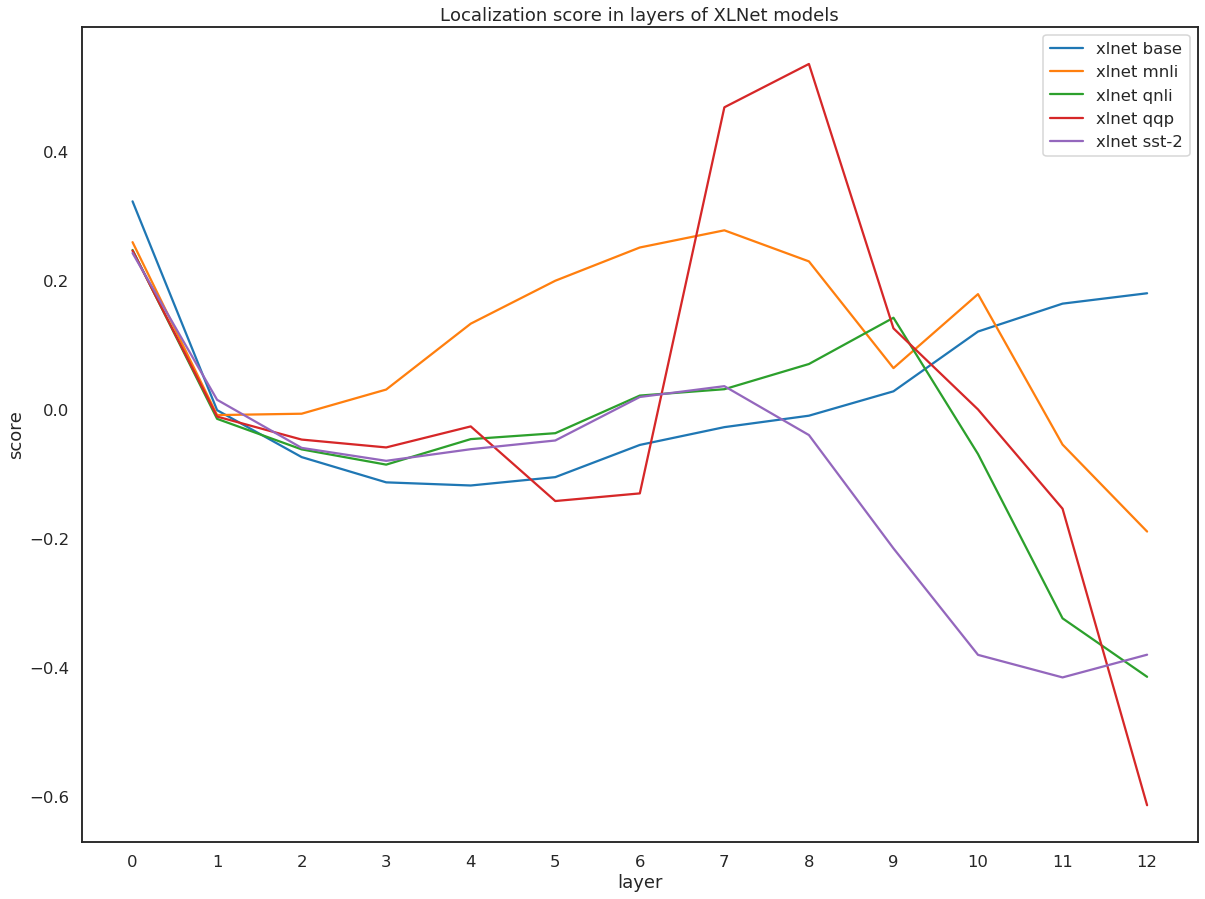

In [46]:
diff_df = pd.DataFrame(diff_ser, columns=['score'])
x = [network_sort_key(layer) for layer in diff_df.index.values]
models, layers = list(zip(*x))
print(models)
models = [model.split('_')[0] + ' ' + model.split('_')[-3] for model in models]
models = ['xlnet base' if model == 'xlnet unfine' else model for model in models]
print(models)
print(layers)
diff_df['layer'] = layers
diff_df['model'] = models
diff_df.head()
g = sns.lineplot(data=diff_df, x='layer', y='score', hue='model')
g.set_xticks(range(13))
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[1:], labels=labels[1:])
g.set_title('Localization score in layers of XLNet models')
g.get_figure().savefig('xlnet-loc-score.pdf')

In [43]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(diff_ser.sort_values())

xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12      -0.612990
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_11    -0.414850
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_12     -0.413896
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_10    -0.379879
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_12    -0.379630
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_11     -0.323264
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_9     -0.214805
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12     -0.188698
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_11      -0.153317
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_5       -0.141417
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_6       -0.129582
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_4    -0.117324
xlnet_base_cased-ptb_pos_dev_unfine_include_embeddings.hdf5_3    -0.112464
xlnet_base_cased-ptb_pos_

In [44]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(locl_ser.sort_values())

xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_12     -1.779238
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_12    -1.724893
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12     -1.684650
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_11     -1.623710
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_10     -1.611136
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_9      -1.566105
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9       -1.470084
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_12      -1.469564
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_10      -1.467700
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_11      -1.467154
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8       -1.460862
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_7       -1.415557
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_11    -1.404322
xlnet_base_cased-ptb_pos_

In [45]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(dist_ser.sort_values())

xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_8       -1.996977
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_7       -1.884493
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_10     -1.790481
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_9      -1.630753
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_9       -1.596352
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_11     -1.569792
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_8      -1.498302
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_12     -1.495952
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_10      -1.468251
xlnet_base_cased-ptb_pos_dev_qnli_include_embeddings.hdf5_12     -1.365342
xlnet_base_cased-ptb_pos_dev_sst-2_include_embeddings.hdf5_12    -1.345263
xlnet_base_cased-ptb_pos_dev_qqp_include_embeddings.hdf5_11      -1.313837
xlnet_base_cased-ptb_pos_dev_mnli_include_embeddings.hdf5_7      -1.200102
xlnet_base_cased-ptb_pos_